In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Reading the datasets

df1 = pd.read_csv("data/BATADAL_dataset03.csv")
df2 = pd.read_csv("data/BATADAL_dataset04.csv")
dftest = pd.read_csv("data/BATADAL_test_dataset.csv")

In [43]:
# fitting a stepwise model:
from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(df1['L_T1'], start_p=1, start_q=1, max_p=10, max_q=10, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()



Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=28103.160, BIC=28117.316, Fit time=0.182 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-558.086, BIC=-536.852, Fit time=0.506 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=16531.825, BIC=16553.059, Fit time=1.866 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-13038.322, BIC=-13010.009, Fit time=1.392 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-13266.336, BIC=-13230.946, Fit time=6.621 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-13267.957, BIC=-13218.411, Fit time=5.552 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-13286.692, BIC=-13244.223, Fit time=5.277 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=-13301.240, BIC=-13251.694, Fit time=7.303 seconds
Fit ARIMA: order=(1, 0, 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8761
Model:               SARIMAX(2, 0, 3)   Log Likelihood                6657.620
Date:                Thu, 30 May 2019   AIC                         -13301.240
Time:                        13:59:03   BIC                         -13251.694
Sample:                             0   HQIC                        -13284.358
                               - 8761                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0914      0.004     24.306      0.000       0.084       0.099
ar.L1          1.8316      0.009    201.424      0.000       1.814       1.849
ar.L2         -0.8658      0.009    -98.762      0.000      -0.883      -0.849
ma.L1          0.1432      0.014     10.463      0.000       0.116       0.170
ma.L2         -0.0868      0.015     -5.606      0.000      -0.117      -0.056
ma.L3         -0.0513      0.013     -3.835      0.000      -0.077      -0.025
sigma2         0.0128      0.000     79.907      0.000       0.012       0.013
===================================================================================
Ljung-Box (Q):                      478.64   Jarque-Bera (JB):               705.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.18
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

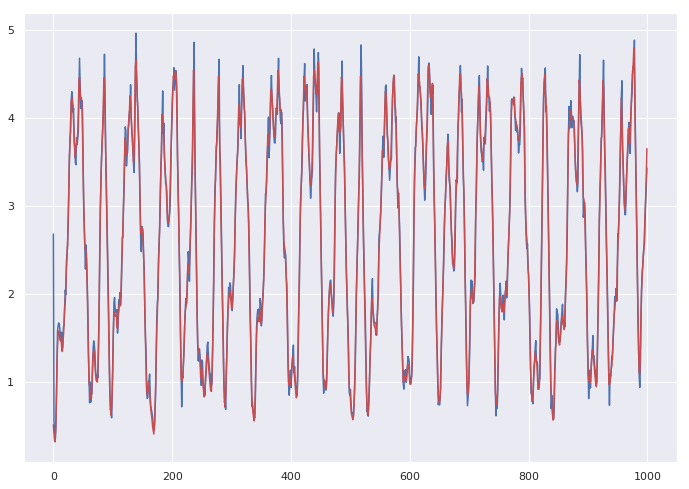

In [40]:
predictions = stepwise_fit.predict_in_sample()
true_data = df1['L_T1']

fig, ax = plt.subplots()
sns.lineplot(data=predictions[0:1000], ax=ax, color='b')
sns.lineplot(data=true_data[0:1000], ax=ax, color='r')

In [41]:
abs(predictions - true_data)

0       2.168410
1       0.138681
2       0.089013
3       0.018663
4       0.047304
5       0.091856
6       0.053765
7       0.157758
8       0.097987
9       0.090258
10      0.095457
11      0.109540
12      0.001285
13      0.040775
14      0.178297
15      0.009593
16      0.046428
17      0.089994
18      0.016959
19      0.000721
20      0.137690
21      0.124851
22      0.076616
23      0.038237
24      0.049352
25      0.070598
26      0.100672
27      0.015851
28      0.062860
29      0.140511
          ...   
8731    0.037017
8732    0.030030
8733    0.005922
8734    0.037668
8735    0.160170
8736    0.069353
8737    0.037655
8738    0.127874
8739    0.061753
8740    0.015185
8741    0.123364
8742    0.033873
8743    0.028578
8744    0.058691
8745    0.120981
8746    0.015568
8747    0.012122
8748    0.046609
8749    0.140087
8750    0.001873
8751    0.417411
8752    0.237631
8753    0.132336
8754    0.116644
8755    0.053774
8756    0.100407
8757    0.048440
8758    0.0859